In [30]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [31]:
# centriods=[(-5,-5),(5,5),(-2.5,2.5)]
# cluster_std=[1,1,1]

In [34]:
# X,y=make_blobs(n_samples=200,cluster_std=cluster_std,centers=centriods,n_features=2,random_state=2)
# df = pd.DataFrame(data=X, columns=['Feature1', 'Feature2'])
# df.to_csv('student_cluster.csv', index=False)
# df
df=pd.read_csv('data/student_cluster.csv')
df
X=df[['Feature1','Feature2']]
X=X.values
X

array([[-1.56811264,  3.96833213],
       [-1.11621897,  2.64834924],
       [-5.18946926, -5.07721867],
       [-5.1144213 , -5.49817419],
       [-3.59929731,  1.81846936],
       [-2.66716877,  1.92338907],
       [-4.24803515, -5.99376098],
       [-5.3135082 , -4.22898826],
       [ 3.93863426,  4.89148318],
       [-4.61813377, -4.43372456],
       [ 6.0858064 ,  5.9021794 ],
       [-1.38935472,  2.12666119],
       [ 4.1500045 ,  4.1476582 ],
       [ 5.08536443,  5.66533428],
       [ 4.52001489,  3.9803509 ],
       [-3.89085672, -6.76491773],
       [-6.09873895, -3.41551294],
       [-0.56684303,  1.42920367],
       [ 5.3359084 ,  6.90437591],
       [-5.26905696, -2.76863321],
       [-7.65944946, -5.09145262],
       [ 4.68430679,  3.6499979 ],
       [-0.85808536,  2.81169771],
       [-5.74787095, -4.99097475],
       [ 5.8695982 ,  3.91290943],
       [-4.52336394,  2.76797258],
       [ 4.38162451,  5.37879447],
       [-3.16466728, -4.55931013],
       [-1.35514462,

<function matplotlib.pyplot.show(close=None, block=None)>

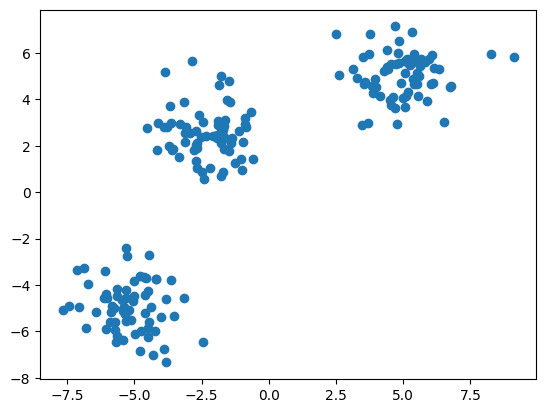

In [35]:
plt.scatter(X[:,0],X[:,1])
plt.show

In [36]:
import random

In [38]:
class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.centroids=None
    def fit_predict(self,X):
        random_index=random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids=X[random_index]
        #print(self.centroids)
        
        for i in range(self.max_iter):
            #assign clusters
            cluster_group=self.assign_clusters(X)
            old_centroid=self.centroids
            #move centroids
            self.centroids=self.move_centroids(X,cluster_group)
            #check finish
            if  (old_centroid==self.centroids).all():
                break
        return cluster_group
        
    def assign_clusters(self,X):
        cluster_group=[]
        distance=[]
        for row in X:
            for centroid in self.centroids:
                distance.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_diatance=min(distance)
            index_pos=distance.index(min_diatance)
            cluster_group.append(index_pos)
            distance.clear()
                
        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        
        new_centroids=[]
        
        cluster_type=np.unique(cluster_group)
        
        for type in cluster_type:
            new_centroids.append(X[cluster_group==type].mean(axis=0))
            
        return np.array(new_centroids)
    
    

In [39]:
km=KMeans(n_clusters=3,max_iter=100)
y_means=km.fit_predict(X)

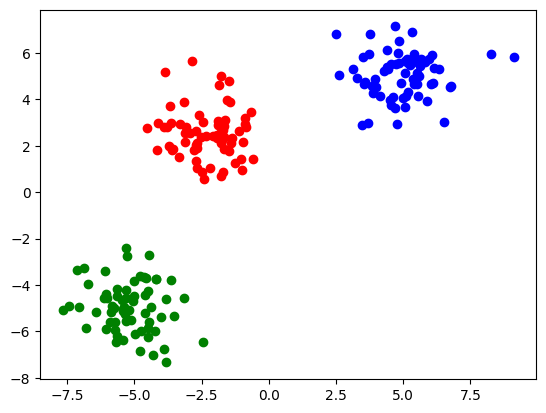

In [40]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='red')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='blue')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='green')